# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [94]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file =  "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train.shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

y_type = set(y_valid)
print()
print("The number of unique classes/labels in the data set is {} types".format(len(y_type)))
print()
print("These type are: {}".format(y_type))
print()
print(y_valid[0])


Image Shape: (34799, 32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples

The number of unique classes/labels in the data set is 43 types

These type are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}

41


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [95]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
y_type = set(y_valid)
n_classes = len(y_type)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(type(X_train))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
<class 'numpy.ndarray'>


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

36


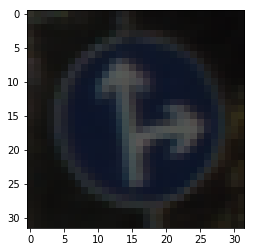

In [151]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
num = random.randint(0, len(X_valid))
#image = mpimg.imread(X_train[num])
plt.imshow(X_valid[num])
print(y_valid[num])

[1820   20  -10  740  230  350 1640  710  740  680  200  830  110   80 1310
 1460 1640 1010  920 1820 1700 1730 1670 1550 1760  650 1460 1790 1520 1760
 1610 1310 1790 1401 1640  920 1670 1820  140 1730 1700 1790 1790]


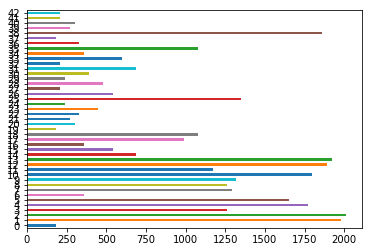

In [45]:
# visualization of each sign in train data set
import numpy as np
import pandas as pd

# Example data
data_ix = pd.Index(y_train)
data_to_show = pd.value_counts(data_ix)

data_to_show = data_to_show.reindex(np.arange(43))
completary_num = 2000 - data_to_show
print(np.array(completary_num))
data_to_show.plot.barh(x='pos', y='num')

plt.show()

In [46]:
# compelement data
## first approach --add gausse noise
## 整体思路：从已有图片中随机产生一张图片，然后随机应用一种数据增强的方法

# 添加椒盐噪声，prob:噪声比例 
import random
import cv2
# method 1
def sp_noiseImg(img_file1,prob):
    image = cv2.cvtColor(img_file1, cv2.COLOR_RGB2GRAY)
    #x_train = cv2.cvtColor(X_train[num], cv2.COLOR_RGB2GRAY)
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
x_train_com = []
y_train_com = []
train_data = pd.Series(y_train).sort_values()
# num_0 = train_data[train_data==0]
# print(num_0)
# print(completary_num)
for i,num in enumerate(completary_num):
    if num > 0:
#  print(num)
        train_i = train_data[train_data == i]
        num_len = len(train_i)
        for j in range(num):
            num_pick = random.randint(0,num_len)
            num_in_X_train = train_i[num_pick:num_pick+1].index
            if len(X_train[num_in_X_train])>0:
                x_train_com.append(sp_noiseImg(X_train[num_in_X_train][0], 0.03).reshape(32,32,1))
                y_train_com.append(i)
c_len = len(x_train_com)
c_pick = random.randint(0,c_len)
# plt.imshow(x_train_com[c_pick])
print(y_train_com[c_pick])
print(c_len)

# saved the processed data!
# Avoid doing the same thing and save time!
import pickle
data = {}
data['features'] = x_train_com
data['labels'] = y_train_com

comp = open('generated.p','wb')
pickle.dump(data, comp, -1)
comp.close()
    

27
51038


In [36]:
# show the comlementary result
data_c = pd.Index(y_train_com)
data_c_show = pd.value_counts(data_c)
data_c_show = data_c_show.reindex(np.arange(43))
print(np.array(data_c_show))
print(np.array(completary_num))


[ 1806.    20.    nan   738.   230.   350.  1632.   710.   740.   679.
   200.   830.   110.    80.  1310.  1458.  1637.  1010.   920.  1812.
  1691.  1726.  1665.  1548.  1753.   650.  1456.  1783.  1519.  1757.
  1607.  1307.  1780.  1401.  1630.   919.  1667.  1810.   140.  1727.
  1695.  1780.  1783.]
[1820   20  -10  740  230  350 1640  710  740  680  200  830  110   80 1310
 1460 1640 1010  920 1820 1700 1730 1670 1550 1760  650 1460 1790 1520 1760
 1610 1310 1790 1401 1640  920 1670 1820  140 1730 1700 1790 1790]


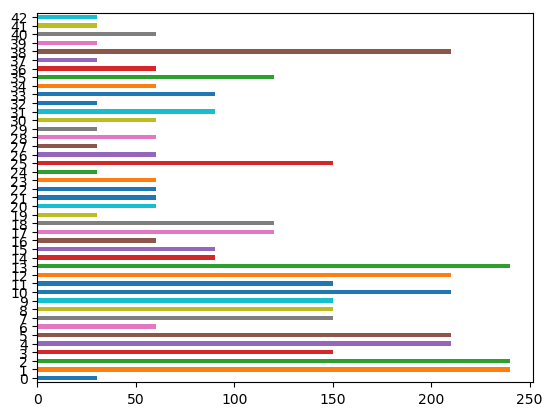

In [7]:
# visualization of each sign in train valid set
import numpy as np
import pandas as pd
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
data_ix = pd.Index(y_valid)
data_to_show = pd.value_counts(data_ix)

data_to_show = data_to_show.reindex(np.arange(43))
#print(data_to_show)
data_to_show.plot.barh(x='pos', y='num')


plt.show()

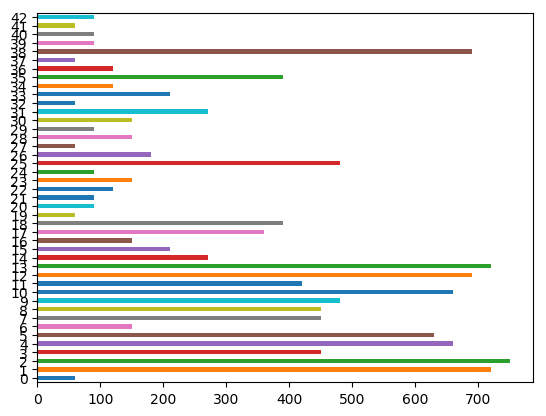

In [6]:
# visualization of each sign in train test set
import numpy as np
import pandas as pd
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
data_ix = pd.Index(y_test)
data_to_show = pd.value_counts(data_ix)

data_to_show = data_to_show.reindex(np.arange(43))
# print(data_to_show)
data_to_show.plot.barh(x='pos', y='num')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
# shuttle the input data
from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train)

In [15]:
# load the generated data
import pickle
from sklearn.utils import shuffle
with open('generated.p', mode='rb') as f:
    train_f = pickle.load(f)

x_train_com, y_train_com = train_f['features'], train_f['labels']

training_file =  "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [16]:
import cv2
import numpy as np
# transfer images to grayscale
X_train_gray = []
for x_train in X_train:
    x_train = cv2.cvtColor(x_train, cv2.COLOR_RGB2GRAY)
    X_train_gray.append(x_train.reshape(32,32,1))


X_valid_gray = []
for x_valid in X_valid:
    x_valid = cv2.cvtColor(x_valid, cv2.COLOR_RGB2GRAY)
    X_valid_gray.append(x_valid.reshape(32,32,1))
# X_valid_gray = np.array(X_valid_gray)

# print(X_train_gray[0])
# print(X_train[0])

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
print(len(X_train_gray))
print(len(x_train_com))
X_train_combined = X_train_gray + x_train_com
y_train_combined = []
y_train_combined = list(y_train) + y_train_com
x_input = (np.float32(X_train_combined)-128) / 128
x_valid = (np.float32(X_valid_gray)-128) / 128
print(len(y_train_com))
print(len(y_train))
print(len(y_train_combined))
## Think: Do we need the grayscale here, it seems that all labels not related to color

34799
51038
51038
34799
85837


In [5]:
# visualization of each sign in train data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data_ix = pd.Index(y_train_combined)
data_to_show = pd.value_counts(data_ix)

data_to_show = data_to_show.reindex(np.arange(43))
completary_num = 2000 - data_to_show
print(np.array(completary_num))
data_to_show.plot.barh(x='pos', y='num')

plt.show()

[  4   0 -10   1   1   0   4   1   2   2   0   0   0   0   5   4   6   1
   0  17   5   7   5   2   7   1   3   9   4   6   2   1  10   4  11   0
   5  13   0   6   6  12   6]


In [5]:
# setup hyper_parameters and tensor flow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 100
BATCH_SIZE = 256

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### TO DO: set right demension
def LeNet(x, keep_prob, is_train):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma)),
        'wh1': tf.Variable(tf.truncated_normal([400,120], mu, sigma)),
        'wh2': tf.Variable(tf.truncated_normal([120,84], mu, sigma)),
        'w_output': tf.Variable(tf.truncated_normal([84,43], mu, sigma))
    }
    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bh1': tf.Variable(tf.zeros(120)),
        'bh2': tf.Variable(tf.zeros(84)),
        'b_output': tf.Variable(tf.zeros(43))        
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Apply Convolution
    conv_layer1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_layer1 = tf.nn.bias_add(conv_layer1, biases['bc1'])
    
    
    # TODO: Activation.
    conv_layer1 = tf.nn.relu(conv_layer1)
    
    conv_layer1 = tf.layers.batch_normalization(conv_layer1, training=is_train)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize=[1, 2, 2, 1],\
                                strides=[1, 2, 2, 1], padding='SAME')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # op basicly same as layer1
    conv_layer2 = tf.nn.conv2d(conv_layer1, weights['wc2'], \
                               strides=[1, 1, 1, 1], padding='VALID')
    # add bias
    conv_layer2 = tf.nn.bias_add(conv_layer2, biases['bc2'])
    
    
    # TODO: Activation.
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    conv_layer2 = tf.layers.batch_normalization(conv_layer2, training=is_train)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=[1, 2, 2, 1],\
                                strides=[1, 2, 2, 1], padding='SAME')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    full_input = tf.contrib.layers.flatten(conv_layer2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    hidden_layer1 = tf.add(tf.matmul(full_input, weights['wh1']), biases['bh1'])
    # TODO: Activation.
    # TO DO:是否要随机丢弃一半
    
    hidden_layer1 = tf.nn.relu(hidden_layer1)
    hidden_layer1 = tf.nn.dropout(hidden_layer1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['wh2']), biases['bh2'])
    # TODO: Activation.
    # Todo: 是否要随机丢弃一半
#     keep_prob2 = 0
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    hidden_layer2 = tf.nn.dropout(hidden_layer2, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(hidden_layer2, weights['w_output']), biases['b_output'])
#     logits = tf.nn.softmax(logits)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# set features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
is_train = tf.placeholder(tf.bool, name="is_train")
one_hot_y = tf.one_hot(y, 43)

In [8]:
# Training Pipeline
rate = 0.0008
logits = LeNet(x, keep_prob, is_train)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):   
    training_operation = optimizer.minimize(loss_operation)

In [9]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, is_train:False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
import random
'''
定义旋转函数：
angle是逆时针旋转的角度
crop是个布尔值，表明是否要裁剪去除黑边
'''
def rotate_image(img, angle, crop):
    h, w = img.shape[:2]
# 旋转角度的周期是360°
    angle %= 360

# 用OpenCV内置函数计算仿射矩阵
    M_rotate = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
# 得到旋转后的图像
    img_rotated = cv2.warpAffine(img, M_rotate, (w, h))

# 如果需要裁剪去除黑边
    if crop:
        angle_crop = angle % 180             # 对于裁剪角度的等效周期是180°
        if angle_crop > 90:                        # 并且关于90°对称
            angle_crop = 180 - angle_crop
            
        theta = angle_crop * np.pi / 180.0    # 转化角度为弧度
        hw_ratio = float(h) / float(w)     # 计算高宽比


        tan_theta = np.tan(theta)                   # 计算裁剪边长系数的分子项
        numerator = np.cos(theta) + np.sin(theta) * tan_theta


        r = hw_ratio if h > w else 1 / hw_ratio# 计算分母项中和宽高比相关的项
        denominator = r * tan_theta + 1# 计算分母项

        crop_mult = numerator / denominator# 计算最终的边长系数
        w_crop = int(round(crop_mult*w))# 得到裁剪区域
        h_crop = int(round(crop_mult*h))
        x0 = int((w-w_crop)/2)
        y0 = int((h-h_crop)/2)
        img_rotated = crop_image(img_rotated, x0, y0, w_crop, h_crop)
    return img_rotated

'''
随机旋转
angle_vari是旋转角度的范围[-angle_vari, angle_vari)
p_crop是要进行去黑边裁剪的比例
'''
def random_rotate(img, angle_vari, p_crop):
    angle = np.random.uniform(-angle_vari, angle_vari)
    crop = False if np.random.random() > p_crop else True
    return rotate_image(img, angle, crop)
# method 1
def rotate_batch(img_batch):
    batch = []
    for image in img_batch:        
        gen = random_rotate(image, 15,0)
        batch.append(gen.reshape(32,32,1))
    return batch
#method 2
def flip_batch(img_batch):
    batch = []
    for image in img_batch:
        gen = np.fliplr(image)
        batch.append(gen)
    return batch
def moving_batch(img_batch):
    batch = []
    a = random.randint(0, 5)
    size = img_batch[0].shape
#     print(size)
    index = random.randint(0, 3)
    for image in img_batch:
        if index == 0:
            img = np.concatenate((image[:, a:], image[:, :a]), axis=1)  #left
        if index == 1:
            img = np.concatenate((image[:, size[1] - a:], image[:, :size[1] - a]), axis=1)  # right
        if index == 2:
            img = np.concatenate((image[a:, :], image[:a, :]), axis=0)   #up
        if index == 3:
            img = np.concatenate((image[size[0] - a:, :], image[:size[0] -a, :]), axis=0)   #down
        batch.append(img)
    return batch
        
def process_batch(batch):  
    index = random.randint(0, 1)
    if index == 0:
        batch = rotate_batch(batch)
    if index ==1:
        batch = moving_batch(batch)
#     batch = flip_batch(batch)
    
    return batch


In [22]:
#test moving
import matplotlib.pyplot as plt
img = X_train_gray[0]
mv = moving_batch(img)
mv = np.array(mv).reshape(32,32)
# print(mv.size)
plt.imshow(mv)
plt.show()

In [11]:
# process training
# x_input = x_input[:1000]
# y_input = y_train[:1000]
# load the data
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_input)
    print("样本总量：{}".format(num_examples))
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_input, y_train_combined = shuffle(x_input, y_train_combined)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_input[offset:end], y_train_combined[offset:end]
            batch_x = process_batch(batch_x)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, is_train: True})
        training_accurancy = evaluate(batch_x, batch_y)   
        validation_accuracy = evaluate(x_valid, y_valid)
        if(validation_accuracy > 0.96):
            break
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accurancy))
        print()
        
    saver.save(sess, './lenet')
    tf.add_to_collection('pred_network', logits)
    print("Model saved")

样本总量：85837
Training...

EPOCH 1 ...
Validation Accuracy = 0.438
Training Accuracy = 0.455

EPOCH 2 ...
Validation Accuracy = 0.666
Training Accuracy = 0.597

EPOCH 3 ...
Validation Accuracy = 0.747
Training Accuracy = 0.727

EPOCH 4 ...
Validation Accuracy = 0.827
Training Accuracy = 0.390

EPOCH 5 ...
Validation Accuracy = 0.832
Training Accuracy = 0.818

EPOCH 6 ...
Validation Accuracy = 0.856
Training Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.880
Training Accuracy = 0.805

EPOCH 8 ...
Validation Accuracy = 0.891
Training Accuracy = 0.805

EPOCH 9 ...
Validation Accuracy = 0.889
Training Accuracy = 0.688

EPOCH 10 ...
Validation Accuracy = 0.899
Training Accuracy = 0.792

EPOCH 11 ...
Validation Accuracy = 0.912
Training Accuracy = 0.883

EPOCH 12 ...
Validation Accuracy = 0.895
Training Accuracy = 0.909

EPOCH 13 ...
Validation Accuracy = 0.918
Training Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy = 0.918
Training Accuracy = 0.896

EPOCH 15 ...
Validation Accuracy 

In [8]:
## method ##
import cv2
import numpy as np
def pre_process(x):
    X_train_gray = []
    for x_train in x:
        x_train = cv2.cvtColor(x_train, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(x_train, (32,32), interpolation=cv2.INTER_CUBIC)
        X_train_gray.append(img.reshape(32,32,1))
    x_input = (np.float32(X_train_gray)-128) / 128
    
    return x_input

In [20]:
import tensorflow as tf
# x_test_pre = pre_process(X_test)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))    
    test_accuracy = evaluate(x_input, y_train_combined)
    print("training Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
training Accuracy = 0.962


In [12]:
import tensorflow as tf
x_test_pre = pre_process(X_test)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))    
    test_accuracy = evaluate(x_test_pre, y_test)
    print("test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
test Accuracy = 0.936


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
## method ##
import cv2
import numpy as np
def pre_process(x):
    X_train_gray = []
    for x_train in x:
        x_train = cv2.cvtColor(x_train, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(x_train, (32,32), interpolation=cv2.INTER_CUBIC)
        X_train_gray.append(img.reshape(32,32,1))
    x_input = (np.float32(X_train_gray)-128) / 128
    
    return x_input

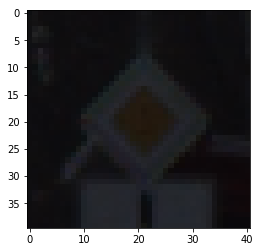

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
dir = "./test_data/00043.ppm"

image = plt.imread(dir)
plt.imshow(image)
plt.show()

6


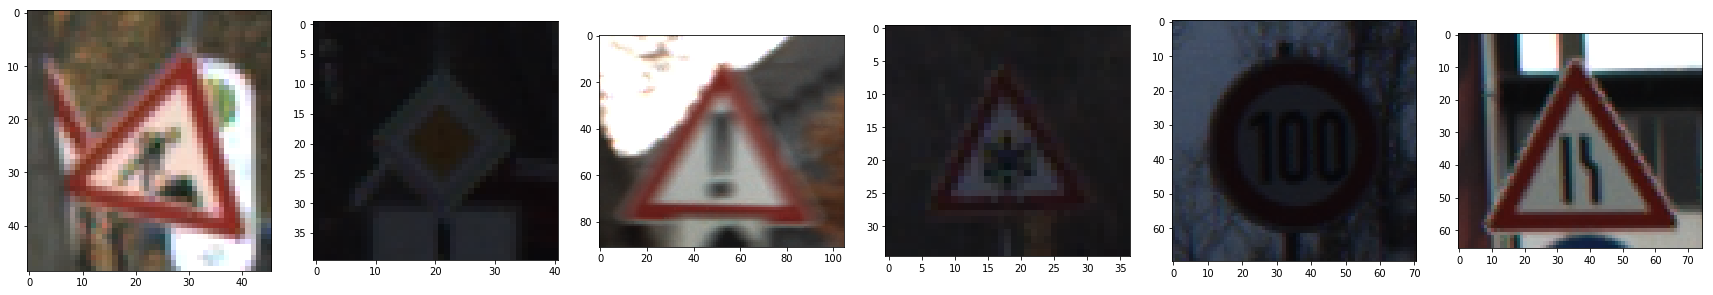

In [25]:
import glob
images = []
labels = [25,26,18,30,7,24]
for file in glob.glob("./test_data/*.ppm"):
    images.append(plt.imread(file))
print(len(images))
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (24, 9))
f.tight_layout()
ax1.imshow(images[0])
ax2.imshow(images[1])
ax3.imshow(images[2])
ax4.imshow(images[3])
ax5.imshow(images[4])
ax6.imshow(images[5])
plt.show()
test_inputs = pre_process(images)
# print(np.array(test_inputs))

In [54]:
def find_max_index(x):
    index = 0
    max_num = 0
    for i, xi in enumerate(x):
        if xi > max_num:
            max_num = xi
            index = i
    return index
# test
# y = [1,2,5,3]
# i = find_max_index(y)
# print(i)
    

### Predict the Sign Type for Each Image

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))    
    web_accuracy = evaluate(test_inputs, labels)
    print("6 Web images Accuracy = {:.3f}".format(web_accuracy))
#     print(is_train)
#     logits = sess.run(logit_soft, feed_dict={x: test_inputs, keep_prob:1.0, is_train:False})
#     print(logits)


 


INFO:tensorflow:Restoring parameters from ./lenet
6 Web images Accuracy = 0.833


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf
logit_soft = tf.nn.softmax(logits)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))  
    logits = sess.run(logit_soft, feed_dict={x: test_inputs, keep_prob:1.0, is_train:False})
#     probability = evaluate(test_inputs, labels)
    probability = sess.run(tf.nn.top_k(tf.constant(logits), k=5))
    print(probability)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99100804e-01,   5.95624908e-04,   9.32152761e-05,
          8.69271316e-05,   5.13266459e-05],
       [  9.99001563e-01,   7.54633686e-04,   8.06848548e-05,
          4.99586713e-05,   4.34381400e-05],
       [  9.91068482e-01,   8.92245304e-03,   9.05386787e-06,
          5.96411498e-09,   2.31950473e-10],
       [  9.69919443e-01,   2.56598108e-02,   3.15511064e-03,
          5.98244136e-04,   3.26355890e-04],
       [  4.40172762e-01,   3.44108880e-01,   1.59513384e-01,
          4.69989963e-02,   4.41888766e-03],
       [  9.91590738e-01,   7.09419930e-03,   6.46200671e-04,
          3.57074256e-04,   1.72557062e-04]], dtype=float32), indices=array([[25, 22, 24, 20, 18],
       [12, 38,  1,  2, 13],
       [18, 26, 27, 24, 11],
       [30, 11, 23, 31, 20],
       [ 7,  8,  4,  5,  3],
       [24, 18, 27, 29, 25]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")